In [1]:
from torch import autocast
from diffusers import StableDiffusionPipeline, LMSDiscreteScheduler
from IPython.display import Image


In [3]:
# this will substitute the default PNDM scheduler for K-LMS  
lms = LMSDiscreteScheduler(
    beta_start=0.00085, 
    beta_end=0.012, 
    beta_schedule="scaled_linear"
)

pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    scheduler=lms,
    use_auth_token=True
).to("cuda")

In [4]:
prompt = "a photo of an astronaut riding a horse on mars"
file_name = "astronaut_rides_horse.png"
with autocast("cuda"):
    image = pipe(prompt)["sample"][0]  
    
image.save(file_name)


/Users/evanmullins/stable-diffusion/venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


0it [00:00, ?it/s]

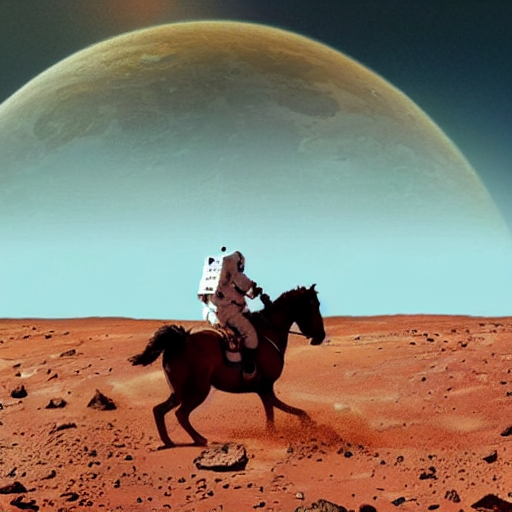

In [6]:
Image(file_name)